In [ ]:
!pip install numpy pandas tensorflow matplotlib


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Load your dataset with the specified encoding
data = pd.read_excel('/content/drive/MyDrive/dataset5/frm00_pro/all_classes00_data.xlsx')

# Assuming the last column is the target
feature_columns = data.columns[:-1]  # All columns except the last one
target_column = data.columns[-1]     # Last column as target

# Prepare features (X) and targets (y)
X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, verify the stratification and the split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Save the splits to new CSV files for future use
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('/content/drive/MyDrive/dataset5/train_test/frm00_train.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/dataset5/train_test/frm00_test.csv', index=False)

print("Data has been split and saved into training and testing CSV files.")


Training set size: 484 samples
Testing set size: 121 samples
Data has been split and saved into training and testing CSV files.


In [ ]:
import numpy as np
import pandas as pd

def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        # Here we're extracting sequences of length n_steps for features
        X.append(data.iloc[i:(i + n_steps), :-3].values)
        # Assuming the last three columns are the target values and we're predicting the next step
        y.append(data.iloc[i + n_steps, -3:].values)
    return np.array(X), np.array(y)

# Load your training and testing datasets
train_data = pd.read_csv('/content/drive/MyDrive/dataset5/train_test/frm00_train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/dataset5/train_test/frm00_test.csv')

# Number of timesteps in the input sequence
n_steps = 5  # You can adjust this based on your specific needs

# Generate sequences for training data
X_train, y_train = create_sequences(train_data, n_steps)
X_test, y_test = create_sequences(test_data, n_steps)

# Example output
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (479, 5, 130)
y_train shape: (479, 3)
X_test shape: (116, 5, 130)
y_test shape: (116, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential([
    LSTM(1000, activation='relu', input_shape=(5, 130)),  # 1000 LSTM units, input_shape matches the X_train shape [timesteps, features]
    Dense(3)  # Output layer with 3 units, one for each predicted feature
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

# Save the model if needed
model.save('/content/drive/MyDrive/dataset5/models/my_lstm_model_00.h5')


Epoch 1/50
15/15 [==============================] - 6s 277ms/step - loss: 0.0785 - accuracy: 0.5365 - val_loss: 0.0204 - val_accuracy: 0.5172
Epoch 2/50
15/15 [==============================] - 5s 337ms/step - loss: 0.0170 - accuracy: 0.5574 - val_loss: 0.0151 - val_accuracy: 0.4741
Epoch 3/50
15/15 [==============================] - 3s 230ms/step - loss: 0.0152 - accuracy: 0.5699 - val_loss: 0.0149 - val_accuracy: 0.5776
Epoch 4/50
15/15 [==============================] - 3s 229ms/step - loss: 0.0146 - accuracy: 0.5595 - val_loss: 0.0151 - val_accuracy: 0.5776
Epoch 5/50
15/15 [==============================] - 4s 248ms/step - loss: 0.0150 - accuracy: 0.5407 - val_loss: 0.0147 - val_accuracy: 0.5776
Epoch 6/50
15/15 [==============================] - 5s 352ms/step - loss: 0.0151 - accuracy: 0.5407 - val_loss: 0.0161 - val_accuracy: 0.5776
Epoch 7/50
15/15 [==============================] - 4s 241ms/step - loss: 0.0149 - accuracy: 0.5177 - val_loss: 0.0160 - val_accuracy: 0.5776
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


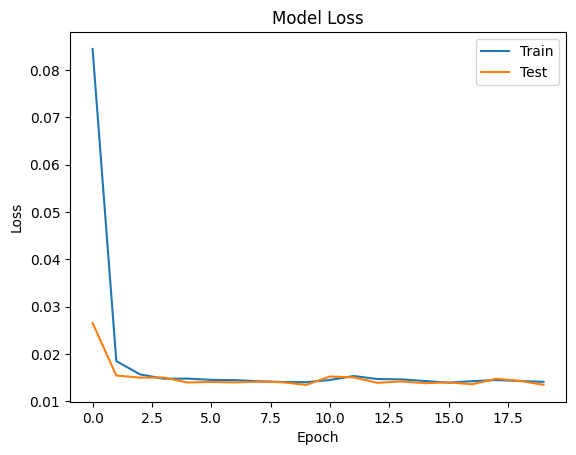

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Save the figure
plt.savefig('/content/drive/MyDrive/dataset5/models/model_loss_plot_00.png')  # Saves the plot as a PNG file
# plt.savefig('model_loss_plot.pdf')  # Uncomment this line to save as a PDF instead

# Display the plot
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the LSTM model
model = Sequential([
    LSTM(1000, activation='relu', input_shape=(5, 130)),  # 1000 LSTM units, input_shape matches the X_train shape [timesteps, features]
    Dense(3)  # Output layer with 3 units, one for each predicted feature
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)

# Save the model if needed
model.save('/content/drive/MyDrive/dataset5/models/my_lstm_model_00_1.h5')


Epoch 1/50
15/15 [==============================] - 5s 251ms/step - loss: 0.0844 - accuracy: 0.4739 - val_loss: 0.0265 - val_accuracy: 0.5776
Epoch 2/50
15/15 [==============================] - 5s 363ms/step - loss: 0.0185 - accuracy: 0.4781 - val_loss: 0.0154 - val_accuracy: 0.5776
Epoch 3/50
15/15 [==============================] - 4s 233ms/step - loss: 0.0157 - accuracy: 0.5094 - val_loss: 0.0150 - val_accuracy: 0.5776
Epoch 4/50
15/15 [==============================] - 4s 270ms/step - loss: 0.0148 - accuracy: 0.5511 - val_loss: 0.0150 - val_accuracy: 0.4224
Epoch 5/50
15/15 [==============================] - 6s 428ms/step - loss: 0.0148 - accuracy: 0.5303 - val_loss: 0.0140 - val_accuracy: 0.5862
Epoch 6/50
15/15 [==============================] - 4s 278ms/step - loss: 0.0145 - accuracy: 0.5073 - val_loss: 0.0141 - val_accuracy: 0.5776
Epoch 7/50
15/15 [==============================] - 3s 221ms/step - loss: 0.0145 - accuracy: 0.5344 - val_loss: 0.0140 - val_accuracy: 0.5776
Epoch 

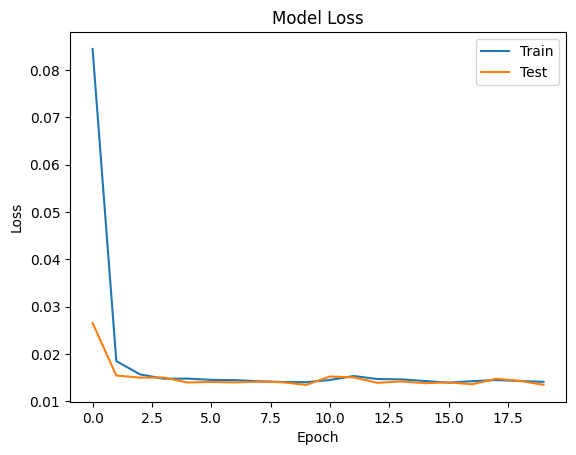

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Save the figure
plt.savefig('/content/drive/MyDrive/dataset5/models/model_loss_plot_00_1.png')  # Saves the plot as a PNG file
# plt.savefig('model_loss_plot.pdf')  # Uncomment this line to save as a PDF instead

# Display the plot
plt.show()
